Dataset Regresión Lineal – Vehicle dataset:

1)	Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [191]:
Datos = pd.read_csv('C:/Vehicle dataset/archive/car data.csv')

In [193]:
Datos.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [195]:
Datos.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [201]:
Datos.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [203]:
Datos.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No se encontraron datos faltantes

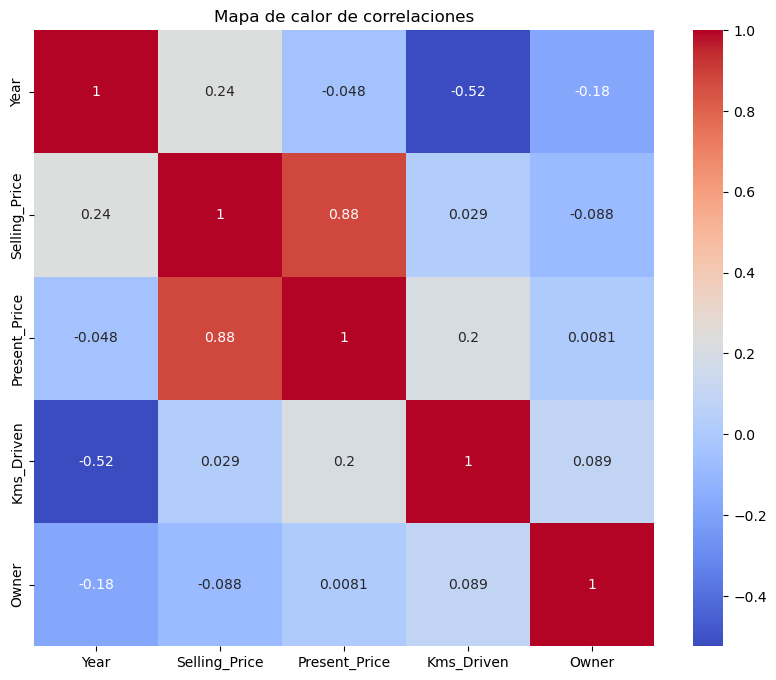

In [205]:
plt.figure(figsize=(10, 8))
sns.heatmap(Datos.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

Al observar la correlación entre las variables numéricas se puede indicar que aquellas que tienen un valor entre 0 y 1 poseen una correlación directa, mientras que por otro lado aquellas que indican un valor cercano a -1 poseen una correlación baja o nula, como es el caso de los Kilómetros conducidos y el año. 

Al observar la matriz de correlación se puede confirmar como los Kilómetros conducidos y el año poseen los valores más bajos de correlación, por otro lado el precio de venta y el precio presente, poseen los niveles más altos de correlación dentro de la matriz.

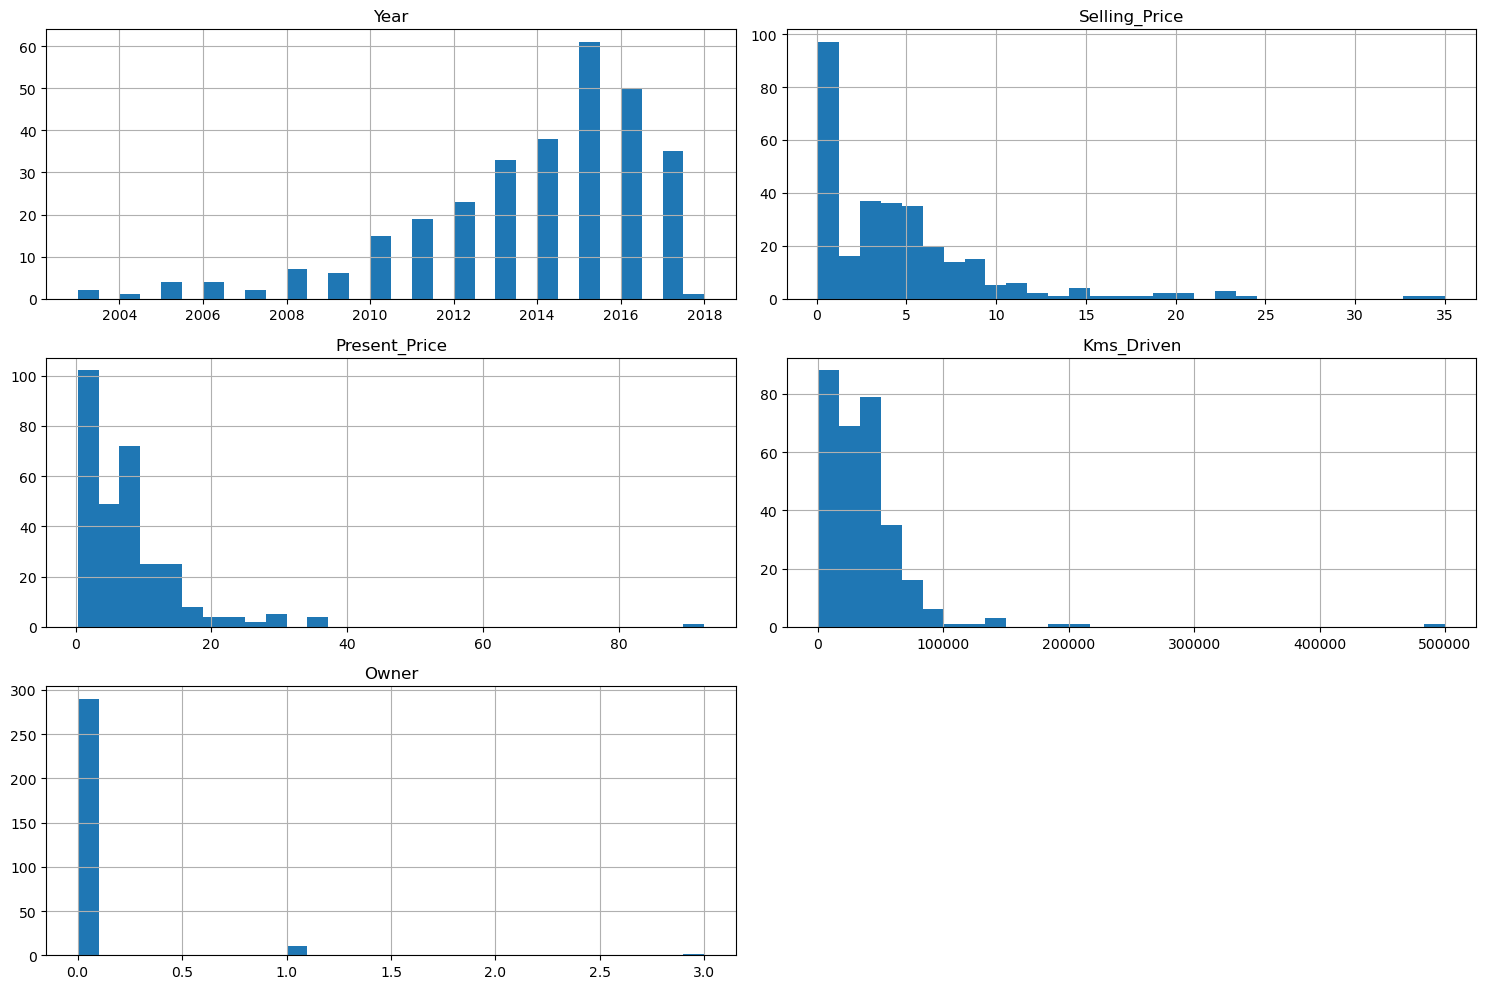

In [207]:
Datos.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

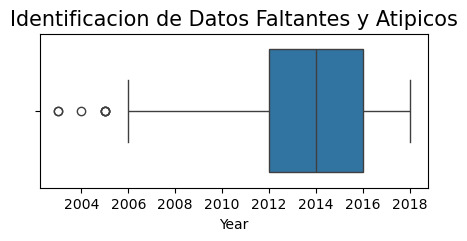

In [165]:
plt.figure(figsize =(5,2))
sns.boxplot(x=Datos['Year'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=15)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

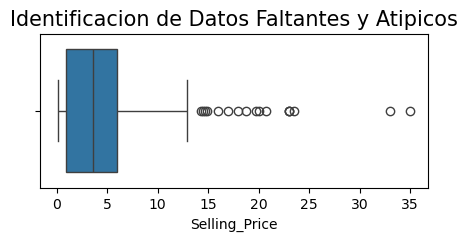

In [167]:
plt.figure(figsize =(5,2))
sns.boxplot(x=Datos['Selling_Price'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=15)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

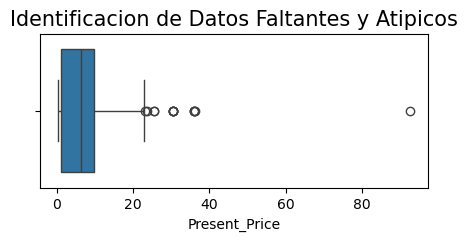

In [169]:
plt.figure(figsize =(5,2))
sns.boxplot(x=Datos['Present_Price'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=15)

Text(0.5, 1.0, 'Identificacion de Datos Faltantes y Atipicos')

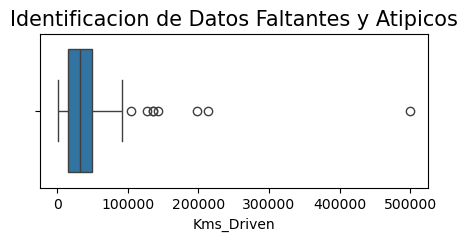

In [171]:
plt.figure(figsize =(5,2))
sns.boxplot(x=Datos['Kms_Driven'])
plt.title('Identificacion de Datos Faltantes y Atipicos', fontsize=15)

2)	Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [173]:
print('Cantidad de Registros con cero en Nombre del Vehiculo: ',Datos['Car_Name'].isin([0]).sum())
print('Cantidad de Registros con cero en el año del Vehiculo: ',Datos['Year'].isin([0]).sum())
print('Cantidad de Registros con cero en el Precio de Venta: ',Datos['Selling_Price'].isin([0]).sum())
print('Cantidad de Registros con cero en el Precio Actual: ',Datos['Present_Price'].isin([0]).sum())
print('Cantidad de Registros con cero en el Tipo de Combustible: ',Datos['Fuel_Type'].isin([0]).sum())
print('Cantidad de Registros con cero en el Tipo de Vendedor: ',Datos['Seller_Type'].isin([0]).sum())
print('Cantidad de Registros con cero en la Transmisión: ',Datos['Transmission'].isin([0]).sum())

Cantidad de Registros con cero en Nombre del Vehiculo:  0
Cantidad de Registros con cero en el año del Vehiculo:  0
Cantidad de Registros con cero en el Precio de Venta:  0
Cantidad de Registros con cero en el Precio Actual:  0
Cantidad de Registros con cero en el Tipo de Combustible:  0
Cantidad de Registros con cero en el Tipo de Vendedor:  0
Cantidad de Registros con cero en la Transmisión:  0


Text(0.5, 1.0, 'Kilometros Recorridos por el Vehiculo')

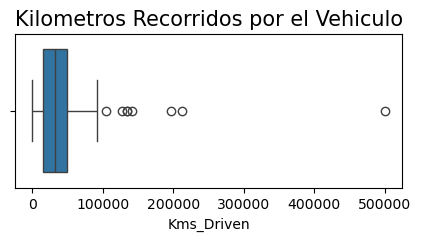

In [175]:
plt.figure(figsize=(5,2))
sns.boxplot(x=Datos['Kms_Driven'])
plt.title('Kilometros Recorridos por el Vehiculo', fontsize=15)

In [257]:
niv_min = 10
niv_max = 200000
Total_Atipicos = ((Datos['Kms_Driven']<niv_min)|(Datos['Kms_Driven']>niv_max)).sum()
print('El total de datos atipicos es {}'.format(Total_Atipicos))

El total de datos atipicos es 2


In [259]:
Datos=Datos[(Datos['Kms_Driven']<niv_max)&(Datos['Kms_Driven']>niv_min)]

In [261]:
Total_Atipicos = ((Datos['Kms_Driven']<niv_min)|(Datos['Kms_Driven']>niv_max)).sum()
print('El total de datos atipicos es {}'.format(Total_Atipicos))

El total de datos atipicos es 0


In [181]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Después de realizar las diferentes filtraciones de los datos atípicos y aplicar las respectivas mitigaciones dentro del dataset se puede observar que ya no existen datos atípicos.

3)	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
  

Características de interés

Selling_Price: Indica el precio del automóvil

Predecir el precio del automóvil en base a sus atributos.

In [214]:
Datos['Selling_Price'].value_counts()

Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64

4)	Dividir el dataset en Train y Test para evaluar correctamente el modelo.
  

In [220]:
X = Datos.drop('Selling_Price', axis=1)
y = Datos['Selling_Price']

In [222]:
X.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [224]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [226]:
selector = SelectKBest(score_func=f_regression, k='all')
fit = selector.fit(X_encoded, y)

In [228]:
scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Score': fit.scores_
}).sort_values(by='Score', ascending=False)

scores

,Feature,Score
1,Present_Price,1015.923320
101,Fuel_Type_Diesel,131.264543
103,Seller_Type_Individual,130.164012
102,Fuel_Type_Petrol,123.445920
84,Car_Name_fortuner,121.963547
...,...,...
95,Car_Name_swift,0.002886
69,Car_Name_brio,0.002796
88,Car_Name_ignis,0.002206
82,Car_Name_etios gd,0.000305


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

5)	Entrenar el modelo configurando los diferentes hiperparámetros.


In [232]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

6)	Evaluar el desempeño del modelo en el conjunto de Test con métricas como R², MSE, RMSE, MAE

In [237]:
y_pred = modelo.predict(X_test)

In [239]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 9.225663641202349


In [241]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.5995038184042526


In [243]:
print("\nCoeficientes del modelo:")
for nombre, coef in zip(X.columns, modelo.coef_):
    print(f"{nombre}: {coef:.2f}")

print(f"\nIntercepto: {modelo.intercept_:.2f}")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coeficiente de determinación (R²): {r2_score(y_test, y_pred):.2f}")


Coeficientes del modelo:
Car_Name: 0.58
Year: 0.61
Present_Price: -0.00
Kms_Driven: 0.27
Fuel_Type: -4.16
Seller_Type: -0.00
Transmission: -6.22
Owner: -6.60

Intercepto: -1165.08
Error cuadrático medio (MSE): 9.23
Coeficiente de determinación (R²): 0.60


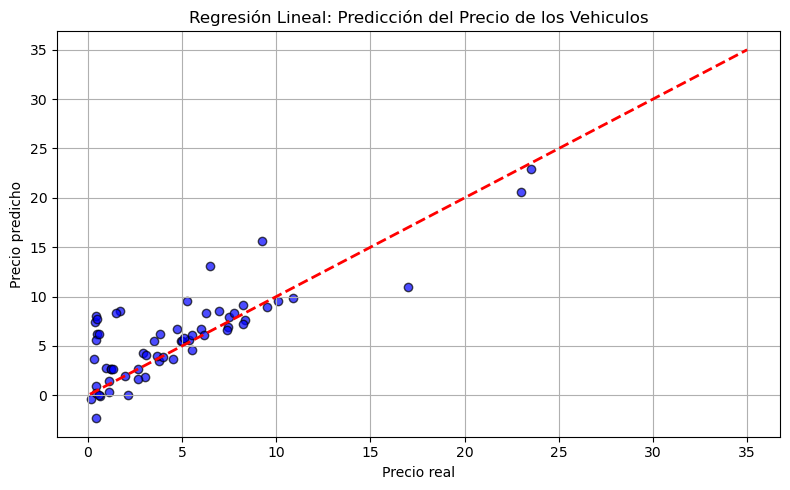

In [249]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Regresión Lineal: Predicción del Precio de los Vehiculos")
plt.grid(True)
plt.tight_layout()
plt.show()

8 ) Interpretar, analizar y documentar los resultados obtenidos.

Después de realizar las diferentes actividades se puede concluir:

•	El número total de registros dentro del Dataset es de 301, dentro de las cuales el año máximo es el 2018 y el mínimo es el 2003

•	La característica de interés es Selling_Price, esta indica el precio del automóvil.

•	No se encontraron datos faltantes 

•	Después de realizar las diferentes filtraciones de los datos atípicos y aplicar las respectivas mitigaciones dentro del dataset se puede observar que ya no existen datos atípicos.

•	MSE: El MSE o Mean Squared Error permite evaluar el rendimiento del modelo entre menor sea el MSE, mayor será la precisión del modelo, esta es del 9.22 lo cual indica que indica que el modelo posee una precisión predictiva de 9.22. 

•	R2 Score: El R2 Score indica que tan acertados son los datos de un modelo en relación con los valores reales, entre más cercano sea a 1 mayor serán los aciertos del modelo, en este caso este tiene un valor de 0.59 o del , lo que indica que el modelo posee un alto nivel de aciertos. 

•	Al observar la correlación entre las variables numéricas se puede indicar que aquellas que tienen un valor entre 0 y 1 poseen una correlación directa, mientras que por otro lado aquellas que indican un valor cercano a -1 poseen una correlación baja o nula, como es el caso de los Kilómetros conducidos y el año.

•	Al observar la matriz de correlación se puede confirmar como los Kilómetros conducidos y el año poseen los valores más bajos de correlación, por otro lado el precio de venta y el precio presente, poseen los niveles más altos de correlación dentro de la matriz.
